In [8]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments,global_solution, multi_segmentation, segment_EV
from Single_nuclei_segmentation import Solv, segmented
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from skimage import img_as_ubyte

6it [00:00, 94.16it/s]


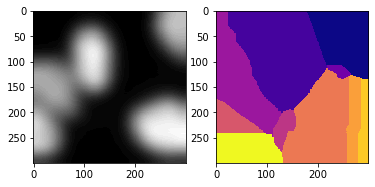

In [9]:
image = plt.imread('images/dna-images/gnf/dna-1.png')[:500,:500,0]   
image = img_as_ubyte(image)
Omega,S = generate_fragments(image,16,0.01,20,2,100)


gaus_img = gaussian_filter(image,16)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(gaus_img,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [10]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
#gaus_img = gaussian_filter(image,16)

In [11]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of  16 | elapsed:    3.6s remaining:    7.9s
[Parallel(n_jobs=-2)]: Done   7 out of  16 | elapsed:    5.4s remaining:    6.9s
[Parallel(n_jobs=-2)]: Done   9 out of  16 | elapsed:    6.7s remaining:    5.2s
[Parallel(n_jobs=-2)]: Done  11 out of  16 | elapsed:    7.8s remaining:    3.5s
[Parallel(n_jobs=-2)]: Done  13 out of  16 | elapsed:    8.7s remaining:    2.0s
[Parallel(n_jobs=-2)]: Done  16 out of  16 | elapsed:    9.7s finished


In [12]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

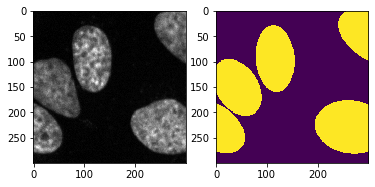

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(seg)

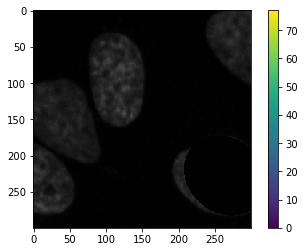

In [16]:
theta, f = Solv(image,ListOfCoords[3])
segmentation = segmented(image,theta,50)
plt.imshow(segmentation)
plt.colorbar()
plt.show()
